# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">Heartbeat Anomoly Detection Using Heart Beat Sound</center>
<p><center style="color:#949494; font-family: consolas; font-size: 20px;">EDA DPL Project</center></p>

***

# <center style="font-family: consolas; font-size: 32px; font-weight: bold;">Results: 86.68% Max Accuracy</center>



In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import nbimporter
from IPython.display import display, HTML

import librosa.display
from IPython.display import SVG
from pydot import graph_from_dot_file
import pydot
pydot.Dot.create(pydot.Dot())

SAMPLE_RATE = 22050
fg_color = 'white'



def plot_signals(samples):
    sns.set(font_scale=1)
    with plt.rc_context({'xtick.color':fg_color, 'ytick.color':fg_color}):
        # Temporary rc parameters in effect
        plt.figure(figsize=(20,9), facecolor='None')
        plt.subplots_adjust(bottom=0.1e-5)
        plt.suptitle("Amplitude vs Time: Audio Time Series for t=2 seconds",x=0.5,y=1.05,fontsize=22, color=fg_color)
        for i, f in enumerate(samples, 1):
            if i < 6:
                y, sr = librosa.load("two_second_audio/" + f, sr=SAMPLE_RATE)
                plt.subplot(2, 3, i)
                librosa.display.waveplot(y, sr=SAMPLE_RATE)
                plt.title(f.split("_")[0], fontsize=18, color=fg_color)
                plt.xlabel('Time (seconds)', fontsize=12, color=fg_color)
                plt.ylabel('Amplitude (dB)', fontsize=12, color=fg_color)
        plt.tight_layout()


def plot_class_distr(labels,labelShare):
    """" Pie Chart """
    fig, ax = plt.subplots(figsize=(9, 9))
    ax.set_title('Count Distribution of Heart Conditions in Combined Dataset',y=1.08, fontsize=24)
    plt.pie(labelShare,labels=labels, autopct='%1.1f%%',startangle=120, textprops={'fontsize': 16})
    ax.set_xlabel('The majority of the audio are normal heart beats', fontsize=20, y=1.08)
    fig.set_facecolor('lightgrey')
    plt.show()


def plot_two_distr(class_labels, label_count, duration_labels, duration_count):
    txt="There is a disproportionate ratio \n of observations in each class"

    """" Pie Chart """
    fig = plt.figure(figsize=(22, 18))
    fig.text(0.37,0.020,txt, fontsize=25)
    sns.set(font_scale=1.7)
    colors = ['#55A868', '#C44E52', '#DD8452', '#4C72B0']
    total_time = sum(duration_count)
    total_count = sum(label_count)
    ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
    ax1.pie(label_count, labels=class_labels, autopct='%1.1f%%',startangle=120, radius = 1.2)
    ax2 = fig.add_axes([.5, .0, .5, .5], aspect=1)
    ax2.pie(duration_count, labels=duration_labels,
            autopct=lambda p : '{:.1f}% ({:,.0f} sec)'.format(p,p * total_time/100),
            startangle=320, radius = 1.2, colors=colors)
    ax1.set_title('Count Distribution of Heart Conditions\n in Combined Dataset',y=1.08, fontsize=30)
    ax2.set_title('Time Distribution of Audio\n in Combined Dataset',y=1.08, fontsize=30)

    fig.set_facecolor('lightgrey')
    plt.show()


def plot_time_dist(duration_labels, duration_count):
    """" Pie Chart """
    fig = plt.figure(figsize=(16, 13))   # smaller 12, 10
    sns.set(font_scale=1.2)
    colors = ['#55A868', '#C44E52', '#DD8452', '#4C72B0']
    total = sum(duration_count)
    ax1 = fig.add_axes([0, 0, .5, .5], aspect=1)
    ax1.pie(duration_count, labels=duration_labels,
            autopct=lambda p : '{:.1f}%  ({:,.0f} sec)'.format(p,p * total/100),
            startangle=140, radius = 1.2, colors=colors)
    ax1.set_title('Time Distribution of Audio\n in Expanded Training Dataset',y=1.08, fontsize=20)
    fig.set_facecolor('lightgrey')
    plt.show()


def plot_source_distr(l):
    """" Bar Plot """
    fig, ax = plt.subplots(figsize=(15, 9))
    sns.set(style="whitegrid"); sns.set(font_scale=2)
    ax = sns.barplot(x="source", y="count", data=l, hue= "source", order=["a", "b"])
    ax.set_xlabel("source",fontsize=20)
    ax.set_ylabel("count",fontsize=20)
    ax.tick_params(labelsize=18)
    legend = ax.legend(title="source", loc = "upper left", prop={'size': 14})
    plt.title("Source of Combined Heartbeat Audio Dataset")
    #fig.set_facecolor('lightgrey')
    legend.texts[0].set_text("Clinical Trial in Hospitals")
    legend.texts[1].set_text("Crowdsourced via iPhone App")

    # annotate seaborn axis
    for p in ax.patches:
        if not np.isnan(p.get_height()):
            ax.annotate("%.0f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', fontsize=18, color='black', xytext=(0, 20),
                     textcoords='offset points')
        _ = ax.set_ylim(0,550) # To make space for the annotations


def plot_keras_model(model, show_shapes=True,show_layer_names=True):
    return SVG(model_to_dot(model, show_shapes=show_shapes,
            show_layer_names=show_layer_names).create(prog='dot',format='svg'))x

In [ ]:


import warnings
import numpy as np
import scipy.io.wavfile
from scipy.fftpack import dct
import matplotlib.pyplot as plt
import seaborn as sns


fg_color = 'white'

def plot_mfccs(samples):
    warnings.filterwarnings('ignore')
    sns.set(font_scale=1)
    with plt.rc_context({'xtick.color':fg_color, 'ytick.color':fg_color}):
        # Temporary rc parameters in effect
        fig, ax = plt.subplots(figsize=(20,9), facecolor='None')
        plt.suptitle("Mel Frequency Cepstral Coefficients for t=2 seconds",x=0.5,y=1.05,fontsize=22, color=fg_color)
        for i, f in enumerate(samples, 1):
            if i < 6:
                mfcc = calc_mfccs(f)
                plt.subplot(2, 3, i)
                # interpolation might throw it off
                im = plt.imshow(mfcc.T, cmap=plt.cm.jet, aspect='auto', interpolation='nearest', vmin=np.amin(mfcc), vmax=np.amax(mfcc)+20)
                plt.xticks(np.arange(0, (mfcc.T).shape[1],
                (mfcc.T).shape[1] / 4.017),
                ['0', '0.5', '1.0', '1.5','2.0','2.5'])
                plt.yticks(np.arange(0, mfcc.shape[1],1.89),
                ['0', '2', '4', '6','8','10', '12'])
                ax = plt.gca()
                ax.invert_yaxis()
                plt.title(f.split("_")[0], fontsize=18, color=fg_color)
                plt.xlabel('Time (seconds)', fontsize=14, color=fg_color)
                plt.ylabel('Cepstral Coefficients', fontsize=14, color=fg_color)
        cbar_ax = fig.add_axes([1, 0.15, 0.05, 0.7])
        fig.colorbar(im, cax=cbar_ax)
        plt.tight_layout()


def calc_mfccs(file):
    sample_rate, signal = scipy.io.wavfile.read('two_second_audio/' + file)
    pre_emphasis = 0.97

    emphasized_signal = np.append(signal[0], signal[1:] - pre_emphasis * signal[:-1])

    frame_size = 0.025
    frame_stride = 0.01

    frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate  # Convert from seconds to samples
    signal_length = len(emphasized_signal)
    frame_length = int(round(frame_length))
    frame_step = int(round(frame_step))
    num_frames = int(np.ceil(float(np.abs(signal_length - frame_length)) / frame_step))  # Make sure that we have at least 1 frame

    pad_signal_length = num_frames * frame_step + frame_length
    z = np.zeros((pad_signal_length - signal_length))
    pad_signal = np.append(emphasized_signal, z) # Pad Signal to make sure that all frames have equal number of samples without truncating any samples from the original signal

    indices = np.tile(np.arange(0, frame_length), (num_frames, 1)) + np.tile(np.arange(0, num_frames * frame_step, frame_step), (frame_length, 1)).T
    frames = pad_signal[indices.astype(np.int32, copy=False)]

    frames *= np.hamming(frame_length)

    NFFT = 512

    mag_frames = np.absolute(np.fft.rfft(frames, NFFT))  # Magnitude of the FFT
    pow_frames = ((1.0 / NFFT) * ((mag_frames) ** 2))  # Power Spectrum

    nfilt = 40

    low_freq_mel = 0
    high_freq_mel = (2595 * np.log10(1 + (sample_rate / 2) / 700))  # Convert Hz to Mel
    mel_points = np.linspace(low_freq_mel, high_freq_mel, nfilt + 2)  # Equally spaced in Mel scale
    hz_points = (700 * (10**(mel_points / 2595) - 1))  # Convert Mel to Hz
    bin = np.floor((NFFT + 1) * hz_points / sample_rate)

    fbank = np.zeros((nfilt, int(np.floor(NFFT / 2 + 1))))
    for m in range(1, nfilt + 1):
        f_m_minus = int(bin[m - 1])   # left
        f_m = int(bin[m])             # center
        f_m_plus = int(bin[m + 1])    # right

        for k in range(f_m_minus, f_m):
            fbank[m - 1, k] = (k - bin[m - 1]) / (bin[m] - bin[m - 1])
        for k in range(f_m, f_m_plus):
            fbank[m - 1, k] = (bin[m + 1] - k) / (bin[m + 1] - bin[m])
    filter_banks = np.dot(pow_frames, fbank.T)
    filter_banks = np.where(filter_banks == 0, np.finfo(float).eps, filter_banks)  # Numerical Stability
    filter_banks = 20 * np.log10(filter_banks)  # dB

    num_ceps = 13

    mfcc = dct(filter_banks, type=2, axis=1, norm='ortho')[:, 1 : (num_ceps + 1)] # Keep 2-13

    cep_lifter = 22

    (nframes, ncoeff) = mfcc.shape
    n = np.arange(ncoeff)
    lift = 1 + (cep_lifter / 2) * np.sin(np.pi * n / cep_lifter)
    mfcc *= lift

    mfcc -= (np.mean(mfcc, axis=0) + 1e-8)

    return(mfcc)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Problem Statement and Data Source :</font></h3>

[Challenge](https://istethoscope.peterjbentley.com/heartchallenge/index.html)

Data from: [Dataset main](https://www.kaggle.com/datasets/kinguistics/heartbeat-sounds) + [Secondary Class organised](https://www.kaggle.com/datasets/abdallahaboelkhair/heartbeat-sound)

<h4 align="left">💼 About the Data:</h4>   

Data has been gathered from two sources: **(A) from the general public via the iStethoscope Pro iPhone app, provided in Dataset A, and (B) from a clinic trial in hospitals using the digital stethoscope DigiScope, provided in Dataset B.**

**CHALLENGE 1 - Heart Sound Segmentation**

The first challenge is to produce a method that can locate S1(lub) and S2(dub) sounds within audio data, segmenting the Normal audio files in both datasets. To enable your machine learning method to learn we provide the exact location of S1 and S2 sounds for some of the audio files. You need to use them to identify and locate the S1 and S2 sounds of all the heartbeats in the unlabelled group. The locations of sounds are measured in audio samples for better precision. Your method must use the same unit.

**CHALLENGE 2 - Heart Sound Classification**

The task is to produce a method that can classify real heart audio (also known as “beat classification”) into one of four categories for Dataset A:

* Normal
* Murmur
* Extra Heart Sound
* Artifact
    
and three classes for Dataset B:

* Normal
* Murmur
* Extrasystole
  
You may tackle either or both of these challenges. If you can solve the first challenge, the second will be considerably easier! The winner of each challenge will be the method best able to segment and/or classify two sets of unlabelled data into the correct categories after training on both datasets provided below. The creator of the winning method will receive a WiFi 32Gb iPad as the prize, awarded at a workshop at AISTATS 2012.

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#DC143C; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #000000"> 🫀 Notebook at a glance</p>

<div style="border-radius:10px; border:#87d8de solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#87d8de'> 📊 EDA will include: </font></h3>
    
- Distrubtuion of data of A and B and distribution of label.

*For each class:*
1. Waveform / Spectrum
2. Frequency distribution using Fourier Transform
3. Spectrogram
4. MFCCs
5. Comparing Patterns

Later, will includes:
- Numerical Columns Heatmap
- Scatter plot and Kdistribution plot for the same.

<h3 align="left"><font color='#87d8de'> 🔧 Pre Processing will include: </font></h3>

1. Duration clipping
2. Low Pass Filterring in Frequency Domain
3. Feature Extraction using MFCC, Chroma shift, roll off etc.
4. Label Encoding
5. Multicollinearity
6. Scalling
7. Test Train Split


<h3 align="left"><font color='#87d8de'> 🚀📈 Model Training and  Evalution: </font></h3>

- An HistGradientBoostingClassifier is used for training the model
    
- Classification Report and Confusion Matrix for evalution

In [ ]:
!wget http://bit.ly/3ZLyF82 -O CSS.css -q

from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)

In [ ]:
#!pip install librosa
!pip install resampy
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 11.8 MB/s eta 0:00:00


In [ ]:
# Utility
import os
import glob
import numpy as np
import math
#from tqdm import tqdm
import itertools
import pandas as pd
import fnmatch
import resampy

#handling audio
from scipy.io import wavfile
import librosa, librosa.display
import IPython.display as ipd
import librosa
import librosa.display

#preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.utils import shuffle
#from sklearn.utils import class_weight
from scipy.signal import butter, lfilter

# Plot
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

#Model
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.model_selection import cross_val_score
#import xgboost as xgb

import warnings
warnings.filterwarnings("ignore")

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4bce55; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"> 📊 EDA</p>

![image.png](attachment:693893be-9f91-4c89-aa65-e83074c54495.png)

In [ ]:
metadataA= pd.read_csv("/content/drive/MyDrive/capstone/input/set_a.csv")

In [ ]:
metadataA.head()

,dataset,fname,label,sublabel
0,a,set_a/artifact__201012172012.wav,artifact,NaN
1,a,set_a/artifact__201105040918.wav,artifact,NaN
2,a,set_a/artifact__201105041959.wav,artifact,NaN
3,a,set_a/artifact__201105051017.wav,artifact,NaN
4,a,set_a/artifact__201105060108.wav,artifact,NaN


In [ ]:
metadataA.label.value_counts()

artifact    40
murmur      34
normal      31
extrahls    19
Name: label, dtype: int64

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=metadataA["label"] , marker_color="#DC143C"))
fig.update_layout(
    title="Meta data A",
    xaxis_title="Classes",
    yaxis_title="Count",
    #legend_title="CSV",
    #showlegend=True,
)

fig.show()

In [ ]:
metadataA.isnull().sum()

dataset       0
fname         0
label        52
sublabel    176
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

We have 52 unlabelled target columns

In [ ]:
metadataA.drop("sublabel" ,axis=1, inplace = True)

In [ ]:
metadataA.shape

(176, 3)

In [ ]:
metadataB = pd.read_csv("/content/drive/MyDrive/capstone/input/set_b.csv")

In [ ]:
metadataB.head()

,dataset,fname,label,sublabel
0,b,set_b/Btraining_extrastole_127_1306764300147_C...,extrastole,NaN
1,b,set_b/Btraining_extrastole_128_1306344005749_A...,extrastole,NaN
2,b,set_b/Btraining_extrastole_130_1306347376079_D...,extrastole,NaN
3,b,set_b/Btraining_extrastole_134_1306428161797_C...,extrastole,NaN
4,b,set_b/Btraining_extrastole_138_1306762146980_B...,extrastole,NaN


In [ ]:
metadataB.label.value_counts()

normal        320
murmur         95
extrastole     46
Name: label, dtype: int64

In [ ]:
metadataB.isnull().sum()

dataset       0
fname         0
label       195
sublabel    507
dtype: int64

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* We have 195 unlabelled target columns

In [ ]:
metadataB.drop("sublabel", axis =1, inplace=True)

In [ ]:
metadataB.shape

(656, 3)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=metadataB["label"] , marker_color="#DC143C"))
fig.update_layout(
    title="Meta data B",
    xaxis_title="Classes",
    yaxis_title="Count",
)

fig.show()

<div style="border-radius:10px; border:#87d8de solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#87d8de'>💡 Getting Sample greater than 4:</font></h3>

    

* This is to make a csv containing A and B both combined.
​
  
* It will include all the labels in both values.
​
    
* Done using a Logic of os and glob function.
    

In [ ]:
#dataset import and append
dataset = []
for folder in ["/content/drive/MyDrive/capstone/input/set_a/**","/content/drive/MyDrive/capstone/input/set_b/**"]:
    for filename in glob.iglob(folder):         #Compares file pattern in folder to what is being fed
        if os.path.exists(filename):
            label = os.path.basename(filename).split("_")[0]       #takes the label out, if you notice, you will realie
# skip audio smaller than 4 secs
       # if librosa.get_duration(filename=filename)>=4:
        if label not in ["Aunlabelledtest", "Bunlabelledtest"]:
            dataset.append({
                            "filename": filename,
                            "label": label
                          })

df = pd.DataFrame(dataset)
df = shuffle(df, random_state=42)

In [ ]:
df2 = pd.concat([metadataA.dropna(),metadataB.dropna()])

In [ ]:
df2.shape

(585, 3)

In [ ]:
df.shape

(585, 2)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* One is from audio file names (both set A and B) and one is from metadata about set A and B combined.

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df["label"] , marker_color="#CD5C5C"))
fig.update_layout(
    title="Audio Distribution Combined",
    xaxis_title="Classes",
    yaxis_title="Count"
)

fig.show()


In [ ]:
df.shape

(585, 2)

In [ ]:
dataset = []
for folder in ["/content/drive/MyDrive/capstone/input/set_a/**","/content/drive/MyDrive/capstone/input/set_b/**"]:
    for filename in glob.iglob(folder):
        if os.path.exists(filename):
            label = os.path.basename(filename).split("_")[0]
# skip audio smaller than 4 secs
        if librosa.get_duration(filename=filename)>=4:
            if label not in ["Aunlabelledtest", "Bunlabelledtest"]:       #we remove the NaN values
                dataset.append({
                                "filename": filename,
                                "label": label
                              })

df = pd.DataFrame(dataset)
df = shuffle(df, random_state=42)

In [ ]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=df["label"] , marker_color="#CD5C5C"))
fig.update_layout(
    title="Audio Distribution Combined",
    xaxis_title="Classes",
    yaxis_title="Count"
)

fig.data[0].hovertext = "Count: " + df["label"].value_counts().to_string()

fig.show()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

- Notice the size of the data has been reduced.

In [ ]:
df.shape

(404, 2)

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4bce55; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">💽 Understanding Audio Data</p>

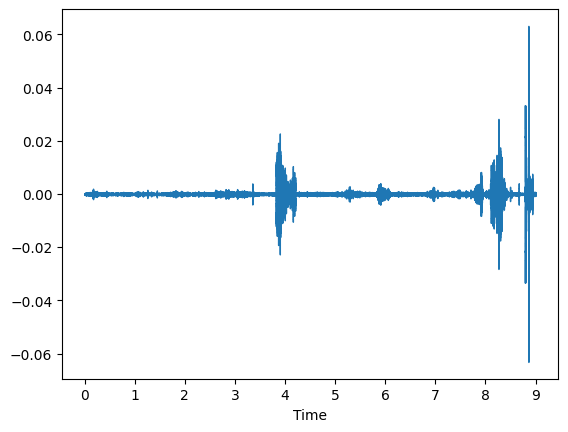

In [ ]:
data,frame=librosa.load('/kaggle/input/heartbeat-sounds/set_a/Aunlabelledtest__201012172010.wav')
librosa.display.waveshow(data,sr=
                         frame)
ipd.Audio('/kaggle/input/heartbeat-sounds/set_a/Aunlabelledtest__201012172010.wav')

<div style="border-radius:10px; border:#87d8de solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#87d8de'>💡 Sampling Rate:</font></h3>

* **The rate at which the audio data is split into samples based on the time period.**
    
* In real time, the signals are taken continuously (known as analog), but the analysis and processing are done indiscrete (known as digital).
    
* So the conversion of signal from continuous to discrete is
  called as sampling.

* There is a rate at which the sampling is done, if it is too
  less then there will be data loss because the sampled
  signal might not contain all the information of the original
  signal.
    
* If the rate is too high, it will take a lot of resource and time for processing. The ideal sampling rate is twice the frequency of t maximum component in the signal (Nyquist thorem).


In [ ]:
frame

NameError: name 'frame' is not defined

**[<h1>💽LINK FOR IN DEPTH AUDIO EDA ](https://www.kaggle.com/arghyapaul/eda-part)**

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4bce55; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">🔧 Preprocessing</p>

<h4> After Clipping by Duration </h4>

We do that so that we get the data which has enough information to pattern within one sample, that is important for extracting some relevant features, too short clips won't have enough *information* to detect any relevant patterns.

```python
if duration > min_duration:                                           #Duration Clipping
                    x, sr = librosa.load(audio_path, duration=min_duration)
```


<h4>Low Pass Filtering </h4>

Most information in heart sounds is contained in the low frequency components, with noise in the higher frequencies. It is common to apply a low-pass filter at 195 Hz. Fast Fourier transforms are also likely to provide useful information about volume and frequency over time.


```python
def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs                                 
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a                                                        #This function returns filtering coefficents


def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y                   #This gives us filtered data


 x_filtered = butter_lowpass_filter(x, low_pass_cutoff, sr)         # Apply the low-pass filter
```

The reason this works is probably that what you hear in the stethoscope is almost exclusively low frequency sounds, especially murmur.

# How we feature extract?

- MFCCs (Mel-Frequency Cepstral Coefficients)

Its important to keep in mind that more we put the n_mfcc's more the amount of features we will get. we should aim to get a good amount but also not overbombard our model with too many features as it **increase the extract as well as train time to handle that many features.**


- MFCCs capture spectral characteristics of an audio signal and are particularly useful for audio classification tasks. They represent the **short-term power spectrum of sound.**

In [ ]:
ad, sr_demo = librosa.load('/content/drive/MyDrive/capstone/input/set_a/Aunlabelledtest__201012172010.wav')

In [ ]:
ad

array([-1.3300074e-04, -3.8742459e-05,  1.9526234e-04, ...,
        9.4768227e-05, -3.0561780e-05,  6.3747764e-05], dtype=float32)

In [ ]:
mfcc_features = librosa.feature.mfcc(y=ad, sr=sr_demo, n_mfcc=120)

In [ ]:
mfcc_features

array([[-7.06924316e+02, -6.67949585e+02, -6.70877014e+02, ...,
        -5.00196991e+02, -5.76922363e+02, -6.37969299e+02],
       [ 2.81231689e+01,  2.85532169e+01,  2.51491451e+01, ...,
         1.21713936e+02,  9.57189178e+01,  6.39696159e+01],
       [-1.64409084e+01, -1.27459240e+01, -1.68281727e+01, ...,
        -1.69453697e+01, -1.15862904e+01, -3.65353775e+00],
       ...,
       [-6.54790163e-01,  2.04110861e-01, -4.20506001e-02, ...,
         1.06477904e+00,  1.50218272e+00,  2.73750067e+00],
       [ 6.09622002e-01, -4.18887138e-01, -7.47131348e-01, ...,
         3.77947330e-01, -4.31340933e-01, -5.65829277e-01],
       [ 8.28672886e-01, -6.72820449e-01,  3.25355768e-01, ...,
        -5.70311785e-01, -1.47344971e+00, -3.71622014e+00]], dtype=float32)

<h2> Streching for Data Augmentation </h2>

When **Shrink** and **Strech** our audio by multiplying it by a factor of 0.8 and 1.2 respectively so that our model is more robust as it is expoused to some disturbance of the same features.

<h3>Zero Crossing Rate</h3>
Zero Crossing Rate measures the rate at which an audio signal changes its sign. It can indicate the presence of silence regions (few zero crossings) or speech regions (more zero crossings) in the signal.

<h3>Spectral Centroid</h3>
Spectral Centroid provides information about the dominant frequency components in an audio signal. It can be used to characterize the "center of mass" of the spectrum.

<h3>Spectral Rolloff</h3>
Spectral Rolloff is a measure of the frequency below which a specified percentage (e.g., 85% or 95%) of the total spectral energy lies. It can help identify the high-frequency content in the audio.

<h3>Chroma Features</h3>
Chroma features represent the 12 different pitch classes (C, C#, D, D#, E, F, F#, G, G#, A, A#, B) in an audio signal. They are useful for analyzing the harmonic content and musical characteristics of the audio.


| Feature Name | Use Description | Example Code |
| --- | --- | --- |
| **MFCC (Mel-Frequency Cepstral Coefficients)** | Capture spectral characteristics, useful for audio classification. | `mfcc_features = np.mean(librosa.feature.mfcc(y=x_filtered, sr=sr, n_mfcc=120), axis=1)` |
| **Zero Crossing Rate** | Indicates the presence of silence and speech regions. | `zero_crossings = np.mean(librosa.feature.zero_crossing_rate(x_filtered))` |
| **Spectral Centroid** | Describes the dominant frequency components in the audio signal. | `spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=x_filtered, sr=sr))` |
| **Spectral Rolloff** | Measures the frequency below which a specified percentage of spectral energy lies. | `spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x_filtered, sr=sr))` |
| **Chroma Features** | Represents the 12 different pitch classes. | `chroma_stft = np.mean(librosa.feature.chroma_stft(y=x_filtered, sr=sr))` |



In [ ]:

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a                                                        #This function returns filtering coefficents

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y                   #This gives us filtered data

def audio_to_df_DPL(audio_folders, columns, type_list, min_duration=4, low_pass_cutoff=195):
    feature_list = []  #features will be added to this list

    for folder in audio_folders:
        for name in type_list:
            files = fnmatch.filter(os.listdir(folder), name)        #checks if its in given label name
            label = name.split("*")[0]                              #takes the label name

            for file in files:
                audio_path = os.path.join(folder, file)
                duration = librosa.get_duration(filename=audio_path)                  #importing audio from path

                if duration > min_duration:                                           #Duration Clipping
                    x, sr = librosa.load(audio_path, duration=min_duration)

                    x_filtered = butter_lowpass_filter(x, low_pass_cutoff, sr)         # Apply the low-pass filter

                    mfcc_features = np.mean(librosa.feature.mfcc(y=x_filtered, sr=sr, n_mfcc=128), axis=1)  # Extract MFCC features


                    zero_crossings = np.mean(librosa.feature.zero_crossing_rate(x_filtered))              # other audio features
                    spectral_centroid = np.mean(librosa.feature.spectral_centroid(y=x_filtered, sr=sr))
                    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x_filtered, sr=sr))
                    chroma_stft = np.mean(librosa.feature.chroma_stft(y=x_filtered, sr=sr))

                    feature_list.append([*mfcc_features, zero_crossings, spectral_centroid, spectral_rolloff, chroma_stft, label, file])

                    # STRECHING FOR AGUMENTATION

                    stretched_x_1 = librosa.effects.time_stretch(x_filtered, rate=0.8)

                    mfcc_features_stretch_1 = np.mean(librosa.feature.mfcc(y=stretched_x_1, sr=sr, n_mfcc=128), axis=1)

                    zero_crossings_stretch_1 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_1))         # Calculate other audio features for the time-stretched version
                    spectral_centroid_stretch_1 = np.mean(librosa.feature.spectral_centroid(y=stretched_x_1, sr=sr))
                    spectral_rolloff_stretch_1 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_1, sr=sr))
                    chroma_stft_stretch_1 = np.mean(librosa.feature.chroma_stft(y=stretched_x_1, sr=sr))

                    feature_list.append([*mfcc_features_stretch_1, zero_crossings_stretch_1, spectral_centroid_stretch_1, spectral_rolloff_stretch_1, chroma_stft_stretch_1, label, file + "_stretch_0.8"])

                    stretched_x_2 = librosa.effects.time_stretch(x_filtered, rate=1.2)  # Apply time-stretching with a factor of 1.2 to the filtered audio


                    mfcc_features_stretch_2 = np.mean(librosa.feature.mfcc(y=stretched_x_2, sr=sr, n_mfcc=128), axis=1)   # Extract MFCC features from the time-stretched audio


                    zero_crossings_stretch_2 = np.mean(librosa.feature.zero_crossing_rate(stretched_x_2))
                    spectral_centroid_stretch_2 = np.mean(librosa.feature.spectral_centroid(y=stretched_x_2, sr=sr))
                    spectral_rolloff_stretch_2 = np.mean(librosa.feature.spectral_rolloff(y=stretched_x_2, sr=sr))
                    chroma_stft_stretch_2 = np.mean(librosa.feature.chroma_stft(y=stretched_x_2, sr=sr))

                    feature_list.append([*mfcc_features_stretch_2, zero_crossings_stretch_2, spectral_centroid_stretch_2, spectral_rolloff_stretch_2, chroma_stft_stretch_2, label, file + "_stretch_1.2"])

    return pd.DataFrame(feature_list, columns=columns)


In [ ]:
def audio_to_df_DPL_withoutstrech(audio_folders, columns, type_list, min_duration=4, low_pass_cutoff=195):
    feature_list = []  # features will be added to this list

    for folder in audio_folders:
        for name in type_list:
            files = fnmatch.filter(os.listdir(folder), name)  # checks if it's in the given label name
            label = name.split("*")[0]  # takes the label name

            for file in files:
                audio_path = os.path.join(folder, file)
                duration = librosa.get_duration(filename=audio_path)  # importing audio from path

                if duration > min_duration:  # Duration Clipping
                    x, sr = librosa.load(audio_path, duration=min_duration)

                    x_filtered = butter_lowpass_filter(x, low_pass_cutoff, sr)  # Apply the low-pass filter

                    mfcc_features = np.mean(librosa.feature.mfcc(y=x_filtered, sr=sr, n_mfcc=120), axis=1)  # Extract MFCC features

                    zero_crossings = np.mean(librosa.feature.zero_crossing_rate(x_filtered))  # other audio features
                    spectral_centroid = np.mean(
                        librosa.feature.spectral_centroid(y=x_filtered, sr=sr))
                    spectral_rolloff = np.mean(librosa.feature.spectral_rolloff(y=x_filtered, sr=sr))
                    chroma_stft = np.mean(librosa.feature.chroma_stft(y=x_filtered, sr=sr))

                    feature_list.append(
                        [*mfcc_features, zero_crossings, spectral_centroid, spectral_rolloff, chroma_stft, label, file])

    return pd.DataFrame(feature_list, columns=columns)



In [ ]:
audio_folders = ["/content/drive/MyDrive/capstone/input/set_a/", "/content/drive/MyDrive/capstone/input/set_b/"]
columns = ["mfcc" + str(i) for i in range(128)]

for name in ["zero", "centroid", "rolloff", "chroma", "label", "file"]:
    columns.append(name)

type_list = ["normal*.wav", "artifact*.wav", "murmur*.wav", "extrastole*.wav" , "extrahls*.wav"]

In [ ]:
audio_df = audio_to_df_DPL(audio_folders, columns, type_list)

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* Audio Data is converted to Numerical Values!

In [ ]:
audio_df.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc124,mfcc125,mfcc126,mfcc127,zero,centroid,rolloff,chroma,label,file
0,-585.288896,35.950862,34.405176,31.939734,28.709261,24.909165,20.757475,16.475634,12.270315,8.318242,...,0.035552,0.027359,0.018527,0.009339,0.012794,143.722709,195.977042,0.581232,normal,normal__201103170121.wav
1,-605.823837,40.088639,38.298558,35.441200,31.693444,27.279826,22.452687,17.470795,12.578752,7.989300,...,0.070522,0.060301,0.044081,0.023280,0.013249,151.084737,207.506307,0.485613,normal,normal__201103170121.wav_stretch_0.8
2,-615.073139,45.560865,43.456839,40.101678,35.707804,30.544587,24.914260,19.125985,13.470877,8.200570,...,0.039763,0.036157,0.027370,0.014716,0.013370,148.083387,197.911072,0.486062,normal,normal__201103170121.wav_stretch_1.2
3,-810.931402,61.300150,58.415132,53.853022,47.946981,41.099498,33.735598,26.261235,19.032765,12.339493,...,-0.000804,-0.001086,-0.001072,-0.000669,0.013920,139.556756,199.835593,0.538899,normal,normal__201104141251.wav
4,-818.605493,59.617224,56.942763,52.703543,47.196272,40.781916,33.845131,26.757351,19.848752,13.391272,...,0.058991,0.046438,0.031923,0.016230,0.012745,136.218212,193.748983,0.477041,normal,normal__201104141251.wav_stretch_0.8


In [ ]:
audio_df.shape

(1212, 134)

In [ ]:
audio_df_cp = audio_df.copy()

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* Our dataframe is sorted, we need to shuffle it.

In [ ]:
audio_df = audio_df.sample(frac=1, random_state=420).reset_index(drop=True)       #no index and shuffle

In [ ]:
audio_df.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc124,mfcc125,mfcc126,mfcc127,zero,centroid,rolloff,chroma,label,file
0,-532.011096,79.644817,74.191170,66.753142,57.529261,47.300153,36.911129,27.177794,18.676031,11.819375,...,0.036951,0.025984,0.006045,-0.006909,0.006386,95.776156,168.676758,0.634524,murmur,murmur_noisymurmur_162_1307101835989_D.wav_str...
1,-636.839589,80.771552,75.984089,69.296397,60.882719,51.393407,41.419988,31.624381,22.596647,14.778583,...,0.057552,0.041379,0.022203,0.008358,0.006183,87.316606,151.978556,0.609296,normal,normal__127_1306764300147_A.wav_stretch_0.8
2,-574.338570,65.057220,61.881114,57.616027,52.187259,45.872888,38.990461,31.975417,25.189941,18.905563,...,0.022408,0.010460,-0.001932,-0.011760,0.005853,88.243588,159.903971,0.638152,normal,normal__149_1306776016110_C1.wav_stretch_0.8
3,-525.399539,59.420772,55.701876,51.812913,47.417678,42.302453,36.466620,30.548526,25.004570,19.847125,...,0.048168,0.055580,0.052851,0.032906,0.005368,82.664341,140.414429,0.670203,extrastole,extrastole__298_1311685888900_C.wav_stretch_1.2
4,-506.566091,51.434651,48.797590,46.352037,43.257439,39.512129,35.189976,30.601192,25.870759,21.108243,...,0.259444,0.207522,0.142306,0.071047,0.006223,88.902166,149.685669,0.622134,murmur,murmur__201108222232.wav_stretch_0.8


In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df) * 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['average'] = desc['mean'].values
    summ['standard_deviation'] = desc['std'].values
    summ['first value'] = df.loc[0].values
    summ['second value'] = df.loc[1].values
    summ['third value'] = df.loc[2].values

    return summ

In [ ]:
summary(audio_df).style.background_gradient(cmap='YlOrBr')

data shape: (1212, 134)


,data type,#missing,%missing,#unique,min,max,average,standard_deviation,first value,second value,third value
mfcc0,float64,0,0.000000,1212,-1131.144513,-414.956783,-588.201399,121.334520,-532.011096,-636.839589,-574.338570
mfcc1,float64,0,0.000000,1212,0.318732,160.906296,75.580314,20.113467,79.644817,80.771552,65.057220
mfcc2,float64,0,0.000000,1212,0.314683,132.003951,70.367248,16.746018,74.191170,75.984089,61.881114
mfcc3,float64,0,0.000000,1212,0.308007,95.072212,63.310248,12.777121,66.753142,69.296397,57.616027
mfcc4,float64,0,0.000000,1212,0.298810,71.028125,54.796644,9.545067,57.529261,60.882719,52.187259
mfcc5,float64,0,0.000000,1212,0.287236,56.895560,45.581746,8.278486,47.300153,51.393407,45.872888
mfcc6,float64,0,0.000000,1212,-14.610095,46.918944,36.356039,8.493660,36.911129,41.419988,38.990461
mfcc7,float64,0,0.000000,1212,-27.799655,38.134871,27.747517,8.860307,27.177794,31.624381,31.975417
mfcc8,float64,0,0.000000,1212,-33.568567,32.027714,20.152489,8.792055,18.676031,22.596647,25.189941
mfcc9,float64,0,0.000000,1212,-34.056907,28.083799,13.762637,8.226666,11.819375,14.778583,18.905563


<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* There are no null values, all columns are numerical in nature except label.

In [ ]:
audio_df.label.value_counts()

normal        648
murmur        306
artifact      120
extrastole     93
extrahls       45
Name: label, dtype: int64

<h3>Encoding

In [ ]:
encoder = LabelEncoder()

coded_label = encoder.fit_transform(audio_df["label"])

In [ ]:
audio_df["label"] = coded_label

In [ ]:
audio_df.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc124,mfcc125,mfcc126,mfcc127,zero,centroid,rolloff,chroma,label,file
0,-532.01,79.64,74.19,66.75,57.53,47.30,36.91,27.18,18.68,11.82,...,0.04,0.03,0.01,-0.01,0.01,95.78,168.68,0.63,3,murmur_noisymurmur_162_1307101835989_D.wav_str...
1,-636.84,80.77,75.98,69.30,60.88,51.39,41.42,31.62,22.60,14.78,...,0.06,0.04,0.02,0.01,0.01,87.32,151.98,0.61,4,normal__127_1306764300147_A.wav_stretch_0.8
2,-574.34,65.06,61.88,57.62,52.19,45.87,38.99,31.98,25.19,18.91,...,0.02,0.01,-0.00,-0.01,0.01,88.24,159.90,0.64,4,normal__149_1306776016110_C1.wav_stretch_0.8
3,-525.40,59.42,55.70,51.81,47.42,42.30,36.47,30.55,25.00,19.85,...,0.05,0.06,0.05,0.03,0.01,82.66,140.41,0.67,2,extrastole__298_1311685888900_C.wav_stretch_1.2
4,-506.57,51.43,48.80,46.35,43.26,39.51,35.19,30.60,25.87,21.11,...,0.26,0.21,0.14,0.07,0.01,88.90,149.69,0.62,3,murmur__201108222232.wav_stretch_0.8


### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4bce55; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300"> 📊 More EDA</p>

<div style="border-radius:10px; border:#DEB887 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#DEB887'>💡 Notes:</font></h3>

* We can will not be analyzing MFCC because on its own they won't provide relevant information anyhow.

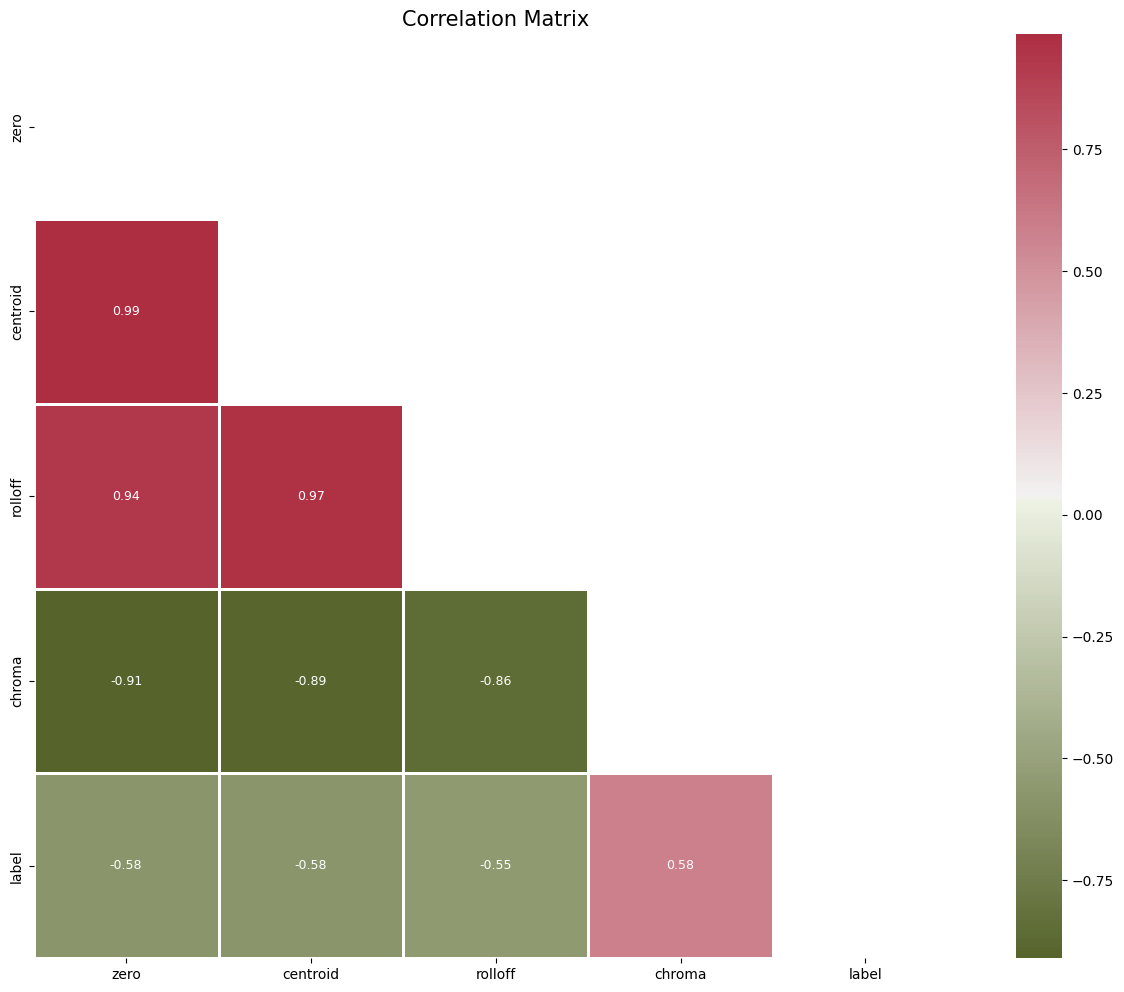

In [ ]:
cmap = sns.diverging_palette(100, 7, s = 75, l = 40, n = 20, center = 'light', as_cmap = True)
mask = np.triu(np.ones_like(audio_df["zero,centroid,rolloff,chroma,label".split(',')].corr(), dtype=bool))        #makes one mask
plt.figure(figsize=(15, 12))

sns.heatmap(audio_df["zero,centroid,rolloff,chroma,label".split(',')].corr(), annot=True, cmap=cmap, fmt='.2f', mask = mask, linewidths=1, square=True, annot_kws={"size": 9} )
plt.title('Correlation Matrix', fontsize=15)
plt.show()

<div style="border-radius:10px; border:#87acde solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#87acde'>💡 Observations Post-Visualization:</font></h3>

* While tree-based models like Decision Trees, Random Forests, and Gradient Boosting Machines are generally robust to multicollinearity, it's still worth noting when certain features are highly correlated. In our heatmap, we observed that Roll off highly correlated with Centroid and zero higly related to centroi having similarity of almost 0.99 and 0.97 respectively, indicating they are essentially the same feature.

* Though correlation is less critical for tree-based models compared to linear models, we should still consider it during the feature selection process. Having features that are highly correlated can make our model unnecessarily complex. When two features have a high correlation, we can consider dropping one to simplify the model and potentially prevent overfitting.


- **Dropping Centroid to fix multicollinearity.**

In [ ]:
audio_df.drop("centroid", axis=1 , inplace= True)

In [ ]:
num_var= audio_df["zero,rolloff,chroma".split(',')]

In [ ]:
def plot_pair(df_train,num_var,target,plotname):
    '''
    Funtion to make a pairplot:
    df_train: total data
    num_var: a list of numeric variable
    target: target variable
    '''
    g = sns.pairplot(data=df_train, x_vars=num_var, y_vars=num_var, hue=target, corner=True)
    g._legend.set_bbox_to_anchor((0.8, 0.7))
    g._legend.set_title(target)
    g._legend.loc = 'upper center'
    g._legend.get_title().set_fontsize(14)
    for item in g._legend.get_texts():
        item.set_fontsize(14)

    plt.suptitle(plotname, ha='center', fontweight='bold', fontsize=25, y=0.98)
    plt.show()

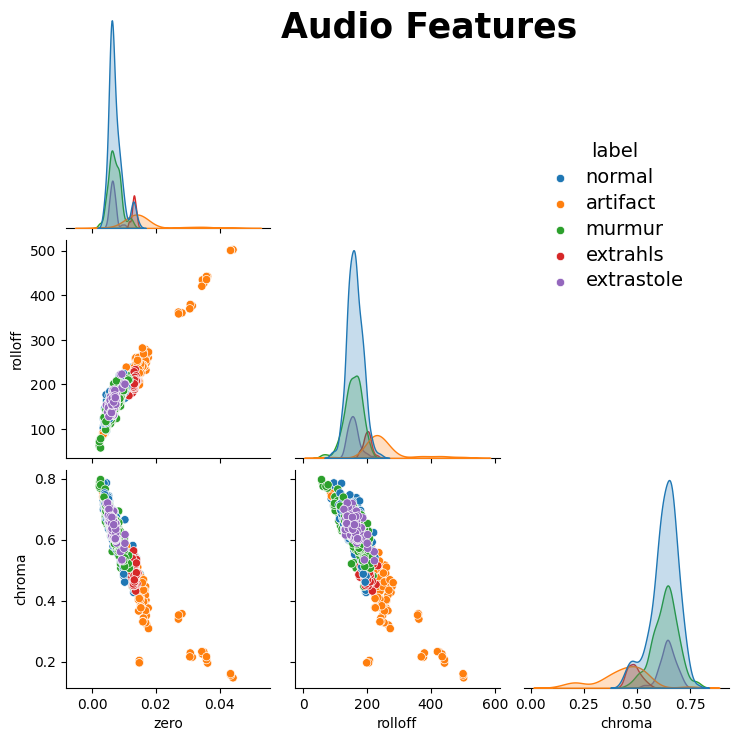

In [ ]:
plot_pair(audio_df_cp, num_var, "label", "Audio Features")

In [ ]:
audio_df.head()

,mfcc0,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,...,mfcc123,mfcc124,mfcc125,mfcc126,mfcc127,zero,rolloff,chroma,label,file
0,-532.01,79.64,74.19,66.75,57.53,47.30,36.91,27.18,18.68,11.82,...,0.05,0.04,0.03,0.01,-0.01,0.01,168.68,0.63,3,murmur_noisymurmur_162_1307101835989_D.wav_str...
1,-636.84,80.77,75.98,69.30,60.88,51.39,41.42,31.62,22.60,14.78,...,0.06,0.06,0.04,0.02,0.01,0.01,151.98,0.61,4,normal__127_1306764300147_A.wav_stretch_0.8
2,-574.34,65.06,61.88,57.62,52.19,45.87,38.99,31.98,25.19,18.91,...,0.04,0.02,0.01,-0.00,-0.01,0.01,159.90,0.64,4,normal__149_1306776016110_C1.wav_stretch_0.8
3,-525.40,59.42,55.70,51.81,47.42,42.30,36.47,30.55,25.00,19.85,...,0.04,0.05,0.06,0.05,0.03,0.01,140.41,0.67,2,extrastole__298_1311685888900_C.wav_stretch_1.2
4,-506.57,51.43,48.80,46.35,43.26,39.51,35.19,30.60,25.87,21.11,...,0.31,0.26,0.21,0.14,0.07,0.01,149.69,0.62,3,murmur__201108222232.wav_stretch_0.8


In [ ]:
audio_df.drop("file", axis=1, inplace= True)

KeyError: "['file'] not found in axis"

In [ ]:
X = audio_df.drop("label", axis=1)
y= audio_df.label

In [ ]:
scaler = StandardScaler()

scaledX = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(scaledX,y,random_state=42, train_size=0.8, shuffle=True)

In [ ]:
X_train.shape , y_train.shape

((969, 131), (969,))

In [ ]:
X_test.shape , y_test.shape

((243, 131), (243,))

### <p style="font-family:JetBrains Mono; font-weight:bold; letter-spacing: 2px; color:#4bce55; font-size:140%; text-align:left;padding: 0px; border-bottom: 3px solid #003300">🚀📈 Model Training and  Evalution:</p>

In [ ]:
scores = cross_val_score(HistGradientBoostingClassifier(), X , y, cv=5)

In [ ]:
scores

array([0.84773663, 0.83539095, 0.81818182, 0.83884298, 0.80165289])

In [ ]:
scores.mean()

0.8283610515933748

In [ ]:
model = HistGradientBoostingClassifier().fit(X_train,y_train)

In [ ]:
y_pred = model.predict(X_test)

<h3>Accuracy score

In [ ]:
report_dict = classification_report(y_test, y_pred, output_dict= True)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        34
           1       1.00      0.70      0.82        10
           2       1.00      0.18      0.30        17
           3       0.90      0.74      0.81        61
           4       0.79      0.98      0.88       121

    accuracy                           0.85       243
   macro avg       0.94      0.71      0.76       243
weighted avg       0.87      0.85      0.83       243



In [ ]:
audio_df.label.value_counts()

4    648
3    306
0    120
2     93
1     45
Name: label, dtype: int64

In [ ]:
ycp = y_test

In [ ]:
y_pred = pd.Series(y_pred)
y_test = pd.Series(ycp)

In [ ]:
y_test

801    4
677    4
43     1
990    3
70     4
      ..
904    4
673    4
708    2
367    4
464    3
Name: label, Length: 243, dtype: int64

In [ ]:
y_pred = y_pred.map({4:"normal" , 3:"murmur" ,0: "artifact" , 2: "extrastole" , 1:"extrahls"})
y_test = y_test.map({4:"normal" , 3:"murmur" ,0: "artifact" , 2: "extrastole" , 1:"extrahls"})

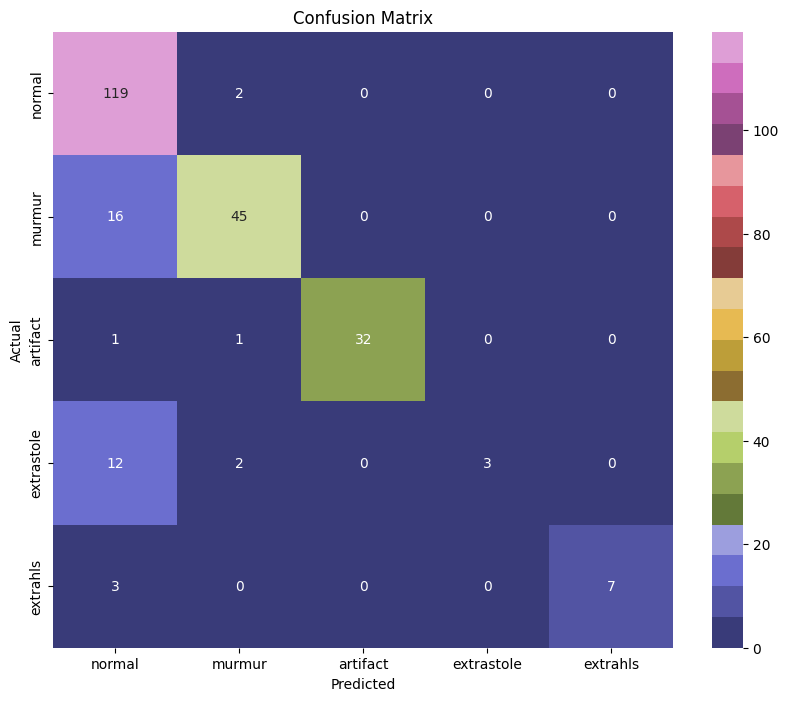

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)

class_labels = ["normal", "murmur", "artifact", "extrastole", "extrahls"]

conf_matrix = confusion_matrix(y_test, y_pred, labels=class_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap= "tab20b", cbar=True,
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

<div style="border-radius:10px; border:#4bce55 solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">

<h3 align="left"><font color='#4bce55'>📕 Conclusion </font></h3>
    
  - Accuracy of 83.423 % and upto 86.68% on second cross validation score out of 5 folds was acheived using a basic HistBoostClassifier (not fined tuned)

### MODEL DUMPING

In [ ]:
!pip install joblib
import joblib

filename = "hb.pkl"

joblib.dump(model, filename)


['hb.pkl']

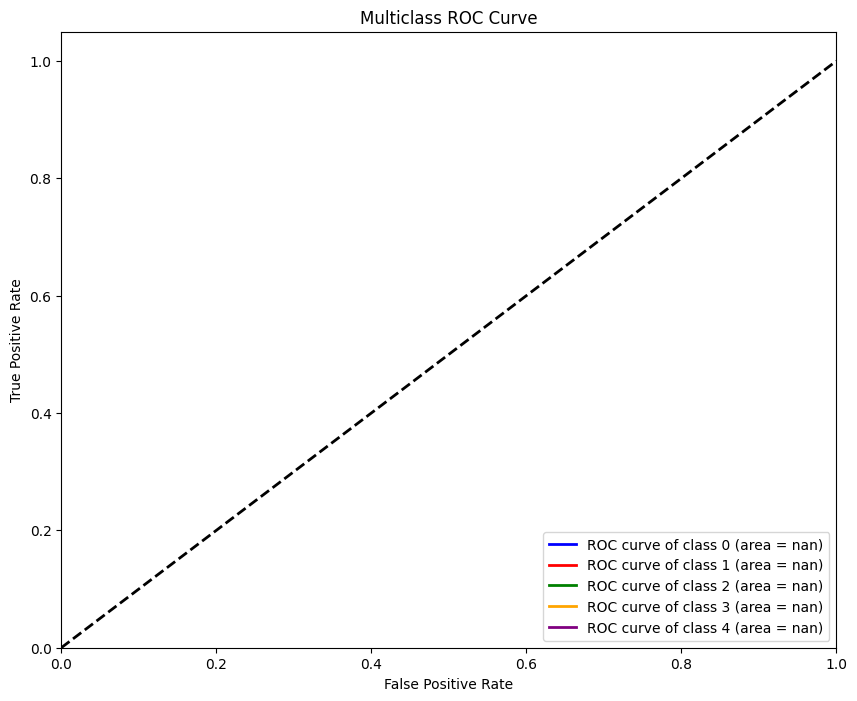

AUC for each class:
Class 0: AUC = nan
Class 1: AUC = nan
Class 2: AUC = nan
Class 3: AUC = nan
Class 4: AUC = nan


In [ ]:
# prompt: find roc and auc for each class and plot it

from sklearn.metrics import roc_curve, auc, multilabel_confusion_matrix
from itertools import cycle
import matplotlib.pyplot as plt

# Calculate ROC and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(np.unique(y_test))

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test == i, y_pred == i)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])
lw = 2

plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Calculate and print AUC for each class
print('AUC for each class:')
for i in range(n_classes):
    print('Class {0}: AUC = {1:0.2f}'.format(i, roc_auc[i]))


<h1>Code Modification: DPL </h1>

### Added Maximum number of MFCC Features (128) **(INCREASED ACCURACY BY 0.1)
![image.png](attachment:6cc2aa14-6e9a-4237-8008-15b8933cb86b.png)


### Streching by 0.5 factor instead of 0.2  **(REDUCED ACCURACY)
![image.png](attachment:eca1f9e7-15ed-4164-b6da-f1a4c8f5324f.png)

### Not Streching **(REDUCED ACCURACY)
![image.png](attachment:d098f46c-9a3b-4747-8252-7295512995fe.png)

### MFCC Reducing to 100 **(REDUCED ACCURACY)
![image.png](attachment:35d5cae8-db11-4e2c-845e-96b7f95d2879.png)

### Using Other Models - Random Forest **(REDUCED ACCURACY)
![image.png](attachment:3a00c392-67f6-4141-8410-0e52f0db0917.png)


<div style="border-radius:10px; border:#554bce solid; padding: 15px; background-color: #FFFAF0; font-size:100%; text-align:left">
<h3 align="left"><font color='#DEB887'>💡 References:</font></h3>


* Best : https://www.kaggle.com/code/kajler/heartbeat-classification-random-forest-mlp , https://www.kaggle.com/code/brsdincer/heartbeat-sounds-classification-analysis#ANALYSIS

* Reads: https://www.kaggle.com/code/paoloripamonti/heartbeat-disease-classifier ,

* Intutive: https://www.kaggle.com/code/ahmederaky/audio-classification#Read-data-from-metadata-csv-file

* LSTM and EDA Guides :  https://www.kaggle.com/code/osamaheikal/heartbeat-sound-lstm-classification-96#EDA-and-Visualization

* Intial reference : https://www.kaggle.com/code/zzettrkalpakbal/heart-murmur-classification
- https://www.kaggle.com/code/ahmederaky/audio-classification#Loading-the-data ~ thought of one function
    
* My old notebooks: https://www.kaggle.com/aaradhyabadal/code
                  

